In [21]:
# caluculate trig function with phase estimation
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

In [22]:
qc_trig = QuantumCircuit(2, 1)
angle = np.pi/8  # define angle to calculate 


qc_trig.h(0) 
qc_trig.x(1)
qc_trig.barrier()
qc_trig.cp(angle, 0, 1)  # phase kick back
qc_trig.h(0)
qc_trig.cp(-angle, 0, 1) # phase kick back 
qc_trig.h(0)

qc_trig.barrier()

# measure Q0 qubit
qc_trig.measure(0, 0)

qc_trig.draw()

┌───┐ ░          ┌───┐          ┌───┐ ░ ┌─┐
q_0: ┤ H ├─░──■───────┤ H ├─■────────┤ H ├─░─┤M├
     ├───┤ ░  │P(π/8) └───┘ │P(-π/8) └───┘ ░ └╥┘
q_1: ┤ X ├─░──■─────────────■──────────────░──╫─
     └───┘ ░                               ░  ║ 
  c: ═════════════════════════════════════════╩═

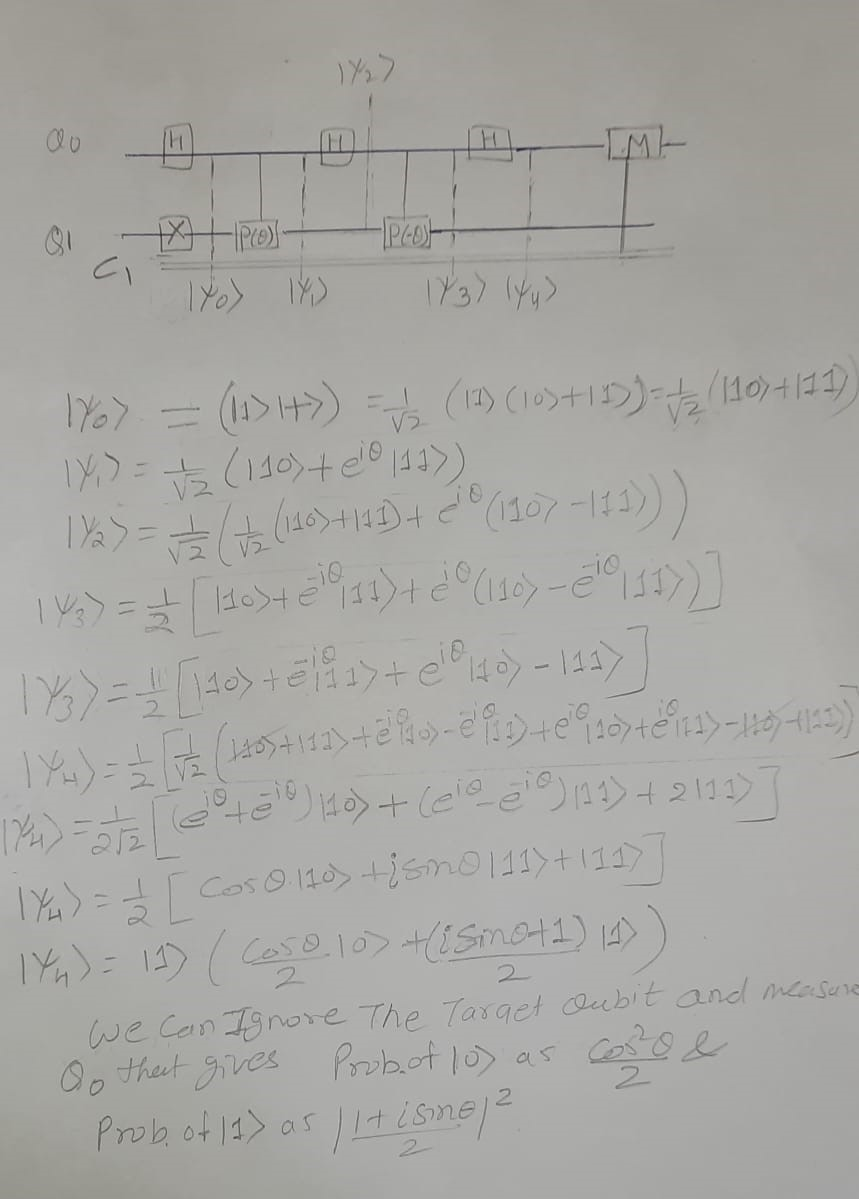

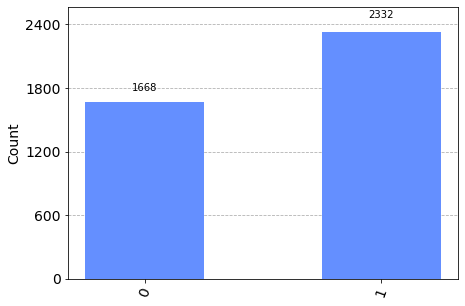

In [23]:
# execute circuit
bkend = Aer.get_backend('qasm_simulator')
shots = 4000
job = execute(qc_trig, bkend, shots=shots)
counts = job.result().get_counts(qc_trig)
plot_histogram(counts)

In [24]:
# get values of cos and sin for given angle 
cos_theta = np.sqrt(counts.get('0')/shots * 2)
sin_theta = np.sqrt(((counts.get('1')/shots) * 2) - 1)
print(counts, cos_theta, sin_theta)

{'0': 1668, '1': 2332} 0.9132360045464699 0.4074309757492672


In [25]:
# end of this program but the begining of new thoughts

In [26]:
# What other values we can find and is there a way to improve probability using lesser number 
# of shots, how qpe can help us get there, check how value of pi can be found in article shared 
# by qiskit.   